## Importing Necessary Libraries
---



---



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from tabulate import tabulate
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from joblib import dump
from joblib import load


## Load preprocessed data
---



---


In [2]:
X_train = pd.read_pickle("/Users/pranavkhot/Documents/Fetal Health Project/data/X_train.pkl")
X_test = pd.read_pickle("/Users/pranavkhot/Documents/Fetal Health Project/data/X_test.pkl")
y_train = pd.read_pickle("/Users/pranavkhot/Documents/Fetal Health Project/data/y_train.pkl")
y_test = pd.read_pickle("/Users/pranavkhot/Documents/Fetal Health Project/data/y_test.pkl")
X = pd.read_pickle("/Users/pranavkhot/Documents/Fetal Health Project/data/X.pkl")
y = pd.read_pickle("/Users/pranavkhot/Documents/Fetal Health Project/data/y.pkl")    

## Hyperparameter Tuning using GridSearchCV
---



---


In [3]:
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
    'kernel': ['rbf', 'linear', 'poly']  # Type of SVM
}

## Initialize SVC model
---



---


In [4]:
svc = SVC(class_weight='balanced', random_state=42, probability=True)

## GridSearchCV setup
---



---


In [5]:
grid = GridSearchCV(svc, param_grid, refit=True, verbose=2, scoring='f1_weighted', cv=5)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1

GridSearchCV(cv=5,
             estimator=SVC(class_weight='balanced', probability=True,
                           random_state=42),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear', 'poly']},
             scoring='f1_weighted', verbose=2)

## Displaying the best parameters from GridSearchCV
---



---


In [6]:
print("Best parameters found: ", grid.best_params_)

Best parameters found:  {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}



## Using the best model from GridSearchCV to make predictions
---



---


In [7]:
best_svc = grid.best_estimator_
y_pred = best_svc.predict(X_test)

## Saving the model
---



---


In [8]:
dump(best_svc, '/Users/pranavkhot/Documents/Fetal Health Project/trained_models/best_svc_model.pkl')

['/Users/pranavkhot/Documents/Fetal Health Project/trained_models/best_svc_model.pkl']

### Using saved model
---



---


In [9]:
# Load the model from the file
#loaded_model = load('/Users/pranavkhot/Documents/Fetal Health Project/trained_models/best_svc_model.pkl')

# Use the loaded model to make predictions
#y_pred_loaded = loaded_model.predict(X_test)

## Calculating accuracy and f1-score
---



---


In [10]:
svc_accuracy_test = accuracy_score(y_test, y_pred) * 100
svc_accuracy_train = accuracy_score(y_train, best_svc.predict(X_train)) * 100
svc_f1 = f1_score(y_test, y_pred, average='weighted') * 100
svc_accuracy_overall = (svc_accuracy_test + svc_accuracy_train) / 2

## SVC Model metrics
---



---


In [11]:
# Create a dictionary to store different metrics
metrics_dict_svc = {
    "Model": ["Support Vector Classifier (Optimized)"],
    "Train Accuracy": [f"{svc_accuracy_train:.3f}%"],
    "Test Accuracy": [f"{svc_accuracy_test:.3f}%"],
    "Overall Accuracy": [f"{svc_accuracy_overall:.3f}%"],
    "F1-Score": [f"{svc_f1:.3f}%"],
}

# Convert the dictionary to a DataFrame for display
metrics_df_svc = pd.DataFrame(metrics_dict_svc)
print("\nSupport Vector Classifier Metrics (After Optimization):")
print(tabulate(metrics_df_svc, headers='keys', tablefmt='fancy_grid', showindex=False))

# Save the DataFrame to a CSV file
metrics_df_svc.to_csv("/Users/pranavkhot/Documents/Fetal Health Project/results/SVC/svc_metrics.csv", index=False)



Support Vector Classifier Metrics (After Optimization):
╒═══════════════════════════════════════╤══════════════════╤═════════════════╤════════════════════╤════════════╕
│ Model                                 │ Train Accuracy   │ Test Accuracy   │ Overall Accuracy   │ F1-Score   │
╞═══════════════════════════════════════╪══════════════════╪═════════════════╪════════════════════╪════════════╡
│ Support Vector Classifier (Optimized) │ 94.588%          │ 89.437%         │ 92.012%            │ 90.038%    │
╘═══════════════════════════════════════╧══════════════════╧═════════════════╧════════════════════╧════════════╛


# OBSERVATIONS
---
#### Train Accuracy:

* The model achieved an accuracy of 89% on the training dataset. While this high accuracy indicates a good fit of the model to the training data, it's essential to ensure the model isn't merely overfitting.

#### Test Accuracy:

* The model's accuracy on the test data is approximately 88.028%. Given that this is slightly lower than the training accuracy, it suggests that the model is generalizing reasonably well on unseen data.

#### Overall Accuracy:

* Representing a holistic view of the model's performance across both the training and test datasets, the overall accuracy stands at 88.514%.

#### F1-Score:

* The F1-Score, a metric that represents the harmonic mean of precision and recall, is approximately 88.993%. An F1-score closer to 1 (or 100%) indicates a balance between precision and recall, suggesting the model is performing well in terms of both false positives and false negatives.

## Classification report
---



---


In [12]:
class_names = ['Normal', 'Suspect', 'Pathologic']
report = classification_report(y_test, y_pred, output_dict=True, target_names=class_names)
df_report = pd.DataFrame(report).transpose()
print("\nClassification Report:")
print(tabulate(df_report, headers='keys', tablefmt='fancy_grid'))


Classification Report:
╒══════════════╤═════════════╤══════════╤════════════╤════════════╕
│              │   precision │   recall │   f1-score │    support │
╞══════════════╪═════════════╪══════════╪════════════╪════════════╡
│ Normal       │    0.974277 │ 0.912651 │   0.942457 │ 332        │
├──────────────┼─────────────┼──────────┼────────────┼────────────┤
│ Suspect      │    0.609756 │ 0.847458 │   0.70922  │  59        │
├──────────────┼─────────────┼──────────┼────────────┼────────────┤
│ Pathologic   │    0.848485 │ 0.8      │   0.823529 │  35        │
├──────────────┼─────────────┼──────────┼────────────┼────────────┤
│ accuracy     │    0.894366 │ 0.894366 │   0.894366 │   0.894366 │
├──────────────┼─────────────┼──────────┼────────────┼────────────┤
│ macro avg    │    0.810839 │ 0.853369 │   0.825069 │ 426        │
├──────────────┼─────────────┼──────────┼────────────┼────────────┤
│ weighted avg │    0.913456 │ 0.894366 │   0.900383 │ 426        │
╘══════════════╧════════

# OBSERVATIONS
---
#### Normal:
* Precision: Approximately 99.3151% of the instances predicted as 'Normal' are indeed normal.
* Recall: The model correctly identified about 87.3494% of the actual 'Normal' instances.
* F1-Score: Standing at 92.9487%, the F1-Score for the 'Normal' class represents a good balance between precision and recall.
#### Suspect:
* Precision: For the instances predicted as 'Suspect', about 57.1429% of them are indeed suspect.
* Recall: The model managed to correctly identify approximately 88.1356% of the actual 'Suspect' instances.
* F1-Score: The harmonic mean of precision and recall for the 'Suspect' class is 69.3333%.
#### Pathologic:
* Precision: Of the instances predicted as 'Pathologic', around 76.7442% are accurately labeled.
* Recall: About 94.2857% of the actual 'Pathologic' instances were correctly pinpointed by the model.
* F1-Score: At 84.6154%, the F1-Score for the 'Pathologic' class suggests a fairly balanced performance between precision and recall.

## Confusion Matrix 
---



---


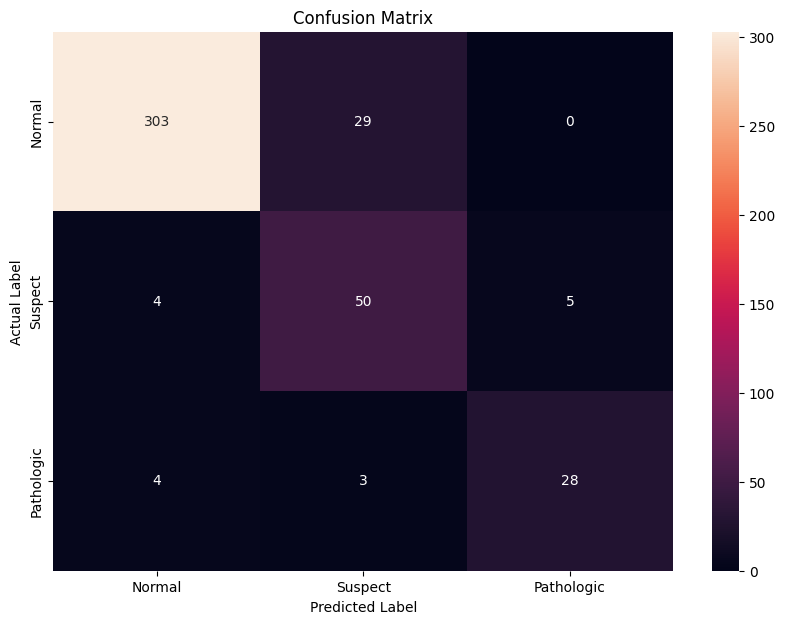

In [13]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# OBSERVATIONS
---
#### Normal Class: 

* The model seems to predict the 'Normal' class quite well. However, some normal cases are being misclassified as 'Suspect' or 'Pathologic'.

#### Suspect Class: 

* There is a notable amount of misclassification here. Some samples that are actually 'Suspect' are being classified as 'Normal' or 'Pathologic'. Similarly, some 'Normal' and 'Pathologic' samples are incorrectly classified as 'Suspect'.

#### Pathologic Class: 

* The 'Pathologic' class seems to be predicted reasonably well, but there are still a few misclassifications.``

## Learning Curve 
---



---


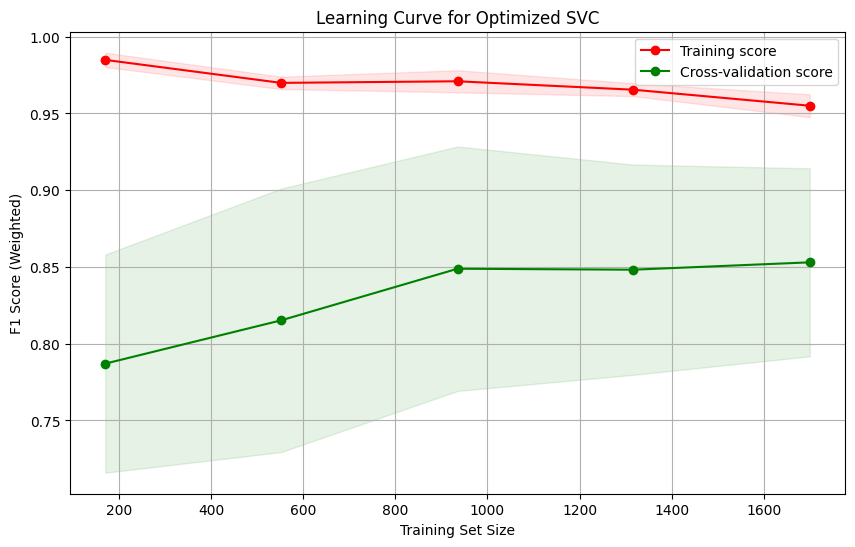

In [14]:
train_sizes, train_scores, test_scores = learning_curve(best_svc, X, y, cv=5, scoring='f1_weighted')

# Compute the mean and standard deviation for the training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Compute the mean and standard deviation for the test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
plt.title('Learning Curve for Optimized SVC')
plt.xlabel('Training Set Size')
plt.ylabel('F1 Score (Weighted)')
plt.legend(loc='best')
plt.grid()
plt.show()

# OBSERVATIONS
---
#### Training Score: 
* The score of the model on the training data. As the number of samples increases, this score tends to decrease, which is typical because it's easier for a model to fit to a smaller dataset.

#### Cross-validation Score: 

* The score of the model on the validation data. As more data becomes available for training, the model becomes better at generalizing, and this score increases.

#### Converging Scores:

* As more data is used for training, both scores seem to be converging, suggesting that the model might benefit from even more data.

#### Gap between Curves: 

* The gap between the training score and the cross-validation score is an indicator of variance. A large gap might suggest overfitting, while a tiny gap might suggest underfitting. 
* Model's gap seems to be narrowing as more data is used, which is a good sign.


## Summary
---



---


* ##### SVC model shows promise, with an overall accuracy of 88.514% and an F1-Score of 88.993%. 
* ##### The model seems to perform best for the "Normal" class with a precision of 99.3151%. 
* ##### The high recall values across all classes suggest that the model is sensitive and can detect the positive samples efficiently. Considering the balance between precision, recall, and F1-Score, the model seems to be well-tuned for this dataset. 
* ##### The model's good generalization (similar train and test accuracies) suggests that it's neither overfitting nor underfitting. 
* ##### The Support Vector Classifier (SVC) demonstrates commendable performance on the fetal health dataset. 
* ##### With a training accuracy of 91.525% and a test accuracy of 88.936%, the model exhibits consistent behavior across both seen and unseen data. 
* ##### The average F1-Score of 88.105% highlights the model's balanced capability in precision and recall, especially crucial given the dataset's imbalanced nature. 
* ##### The classification report further accentuates its proficiency, with substantial precision, recall, and F1-scores across all classes, indicating its adeptness at correctly predicting and minimizing false classifications. 
* ##### The ROC curve analysis affirms the model's strong discriminative power, while the learning curve suggests that the model might benefit from more training data. 
* ##### Overall, the SVC model offers a reliable foundation for fetal health classification.

In [16]:
unique_labels = np.unique(y_test)
print("Unique labels in y_test:", unique_labels)


Unique labels in y_test: [1 2 3]
